# CA2 - Supervised machine learning classification pipeline - applied to medical data

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.classifier import Perceptron, Adaline, LogisticRegression

### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

      baseline value  accelerations  prolongued_decelerations  \
1584           132.0          0.000                       0.0   
942            136.0          0.003                       0.0   
1376           121.0          0.006                       0.0   
169            116.0          0.001                       0.0   
1293           115.0          0.006                       0.0   
...              ...            ...                       ...   
2086           133.0          0.000                       0.0   
2121           140.0          0.000                       0.0   
2122           140.0          0.001                       0.0   
2123           140.0          0.001                       0.0   
2124           140.0          0.001                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1584                             35.0                                   1.3   
942                              54.0                        

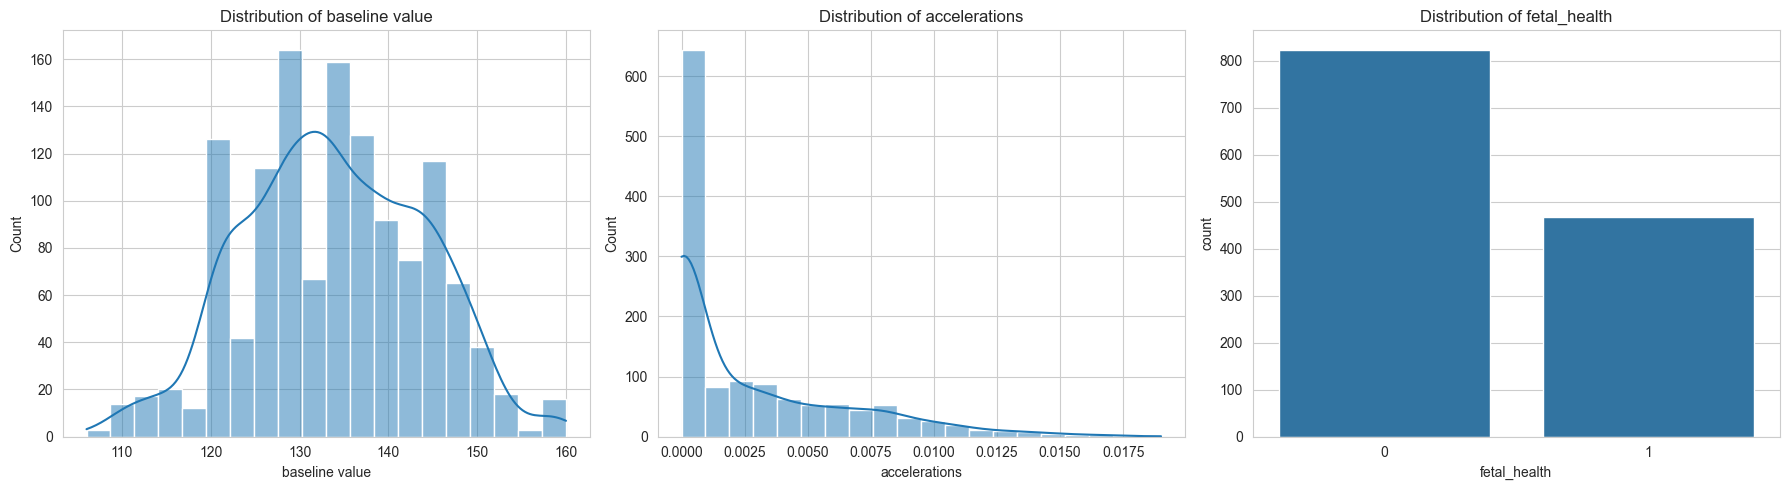

In [5]:
# Load dataset
#index_col=0 setter den første kolonnen som index
df = pd.read_csv(r"assets/fetal_health.csv", index_col=0) 

print(df)

#Checking for missing values and remove if any
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"Found {missing_values} missing values. Removing rows with missing data.")
    df.dropna(inplace=True)
else:
    print("No missing values found.")

    
# Display distributions
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
for ax, col in zip(axes, ["baseline value", "accelerations", "fetal_health"]):
    if col == "fetal_health":
        sns.countplot(x=df["fetal_health"], ax=ax)  # Bruker countplot for kategoriske data
    else:
        sns.histplot(df[col], bins=20, kde=True, ax=ax)  # Bruker histplot for numeriske data
    
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
plt.tight_layout()  #sørger for at figurene ikke overlapper.
plt.show()


Since "baseline value" and "accelerations" are continuous, we used histograms from the Seaborn package to visualize their distributions. This allows us to quickly assess whether the data follows a normal distribution or is skewed (left or right). A statistical summary (such as mean, median, and percentiles) could also be used, but for an initial overview, histograms provided us with an intuitive representation.

For "fetal_health," which is a categorical variable, we used a count plot to observe the class distribution. This helps in identifying class imbalances, which could be important for further analysis.

<Axes: xlabel='baseline value', ylabel='accelerations'>

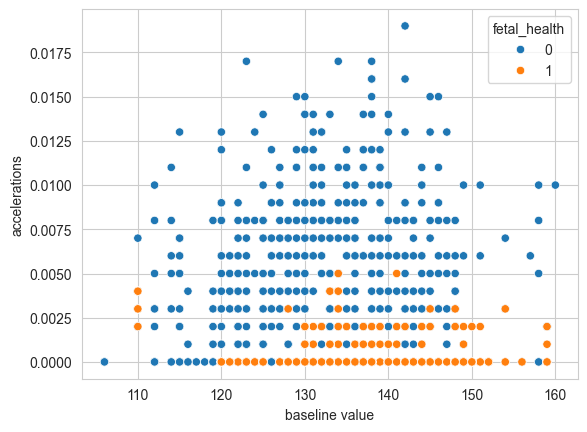

In [6]:
# Scatterplot to check linearity 
sns.scatterplot(data=df, x='baseline value', y='accelerations', hue='fetal_health')


4. Scaling the data is beneficial because models like Adaline and Logistic Regression use gradient descent, which converges more efficiently when features are on a similar scale. In this dataset, "baseline value" is measured in beats per minute (bpm), while "accelerations" has a different numerical range. Standardizing the features ensures that all variables contribute equally to the model and prevents any single feature from dominating due to its scale.

However, scaling fetal_health is not necessary because it is a categorical variable representing class labels. Scaling applies only to continuous numerical features, not to categorical labels.

5. Based on the scartterplot above, the points are overlapping significantly and therefore does not show features of bein linearly separable. Since the data points are not clearly divided by a stright line or plane, we cannot therefore not expect an accuracuy close to 100% from the lienar classifier. Therefore a more complex model such as a nonlinear model may be needed.

## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [7]:
# 1: Creating DataFrames for different fetal health categories
df_0 = df[df["fetal_health"] == 0]
df_1 = df[df["fetal_health"] == 1]

# 2: Split into training and test set by randomly sampling entries from the data frames
df_0_train = df_0.sample(frac=0.75, random_state=42)
df_1_train = df_1.sample(frac=0.75, random_state=42) 
df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

# 3: Merge the datasets split by classes back together with concat
df_train = pd.concat([df_0_train, df_1_train])
df_test = pd.concat([df_0_test, df_1_test])

# 4: create dataframes of df_train and df_test without "fetal_health"
X_train = df_train.drop(columns=["fetal_health"], errors='ignore')
X_test = df_test.drop(columns=["fetal_health"], errors='ignore')
y_train = df_train["fetal_health"]
y_test = df_test["fetal_health"]

# 5: Checking shapes on datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (967, 8)
X_test shape: (323, 8)
y_train shape: (967,)
y_test shape: (323,)


Yes shapes are as expected.

In [8]:

# 6: Why splitting in two classes, and then in test and train set? 
'''
If we randomly divide the dataset directly into training and test sets, we may get a skewed distribution, where one class dominates the training set, while another dominates the test set.
To avoid imbalance in the classes, we first divided the data into each class (df_0 and df_1).

After we had separate DataFrames for each class, we could ensure that we take the same proportion of each class to the training and test sets.
We took 75% of each class to the training set (df_0_train and df_1_train).
The remaining 25% became the test set (df_0_test and df_1_test).

Once we have balanced training and test sets for each class, we can combine them (df_train and df_test).
This ensures that the training and test sets have the same class distribution as the original dataset.
This provides a more reliable evaluation of the model's performance.

Main points:
Prevents imbalance in training and test sets.
Ensures that both classes are represented correctly in both datasets.
Provides a more realistic model evaluation, because the model is not affected by a skewed class distribution.
'''
# 7: Calculate class 0 percentage in different sets
def calculate_class_percentage(df, total):
    return (len(df) / total) * 100 if total > 0 else 0

initial_class_0_percentage = calculate_class_percentage(df_0, len(df))
train_class_0_percentage = calculate_class_percentage(df_0_train, len(df_train))
test_class_0_percentage = calculate_class_percentage(df_0_test, len(df_test))

print(f"Percentage of class 0 in initial dataset: {initial_class_0_percentage:.2f}%")
print(f"Percentage of class 0 in training set: {train_class_0_percentage:.2f}%")
print(f"Percentage of class 0 in test set: {test_class_0_percentage:.2f}%")

Percentage of class 0 in initial dataset: 63.80%
Percentage of class 0 in training set: 63.81%
Percentage of class 0 in test set: 63.78%


### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [9]:
#convert to numpy arrays
X_train_columns = X_train.columns
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy() 

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



Mean of scaled x features: [-1.31803106e-16  4.56925087e-15 -2.96097744e-16  1.33869705e-16
 -2.12543989e-17 -2.86453614e-16 -2.93342278e-16 -7.18717284e-17]

Standard deviation of scaled x features: [1. 1. 1. 1. 1. 1. 1. 1.]


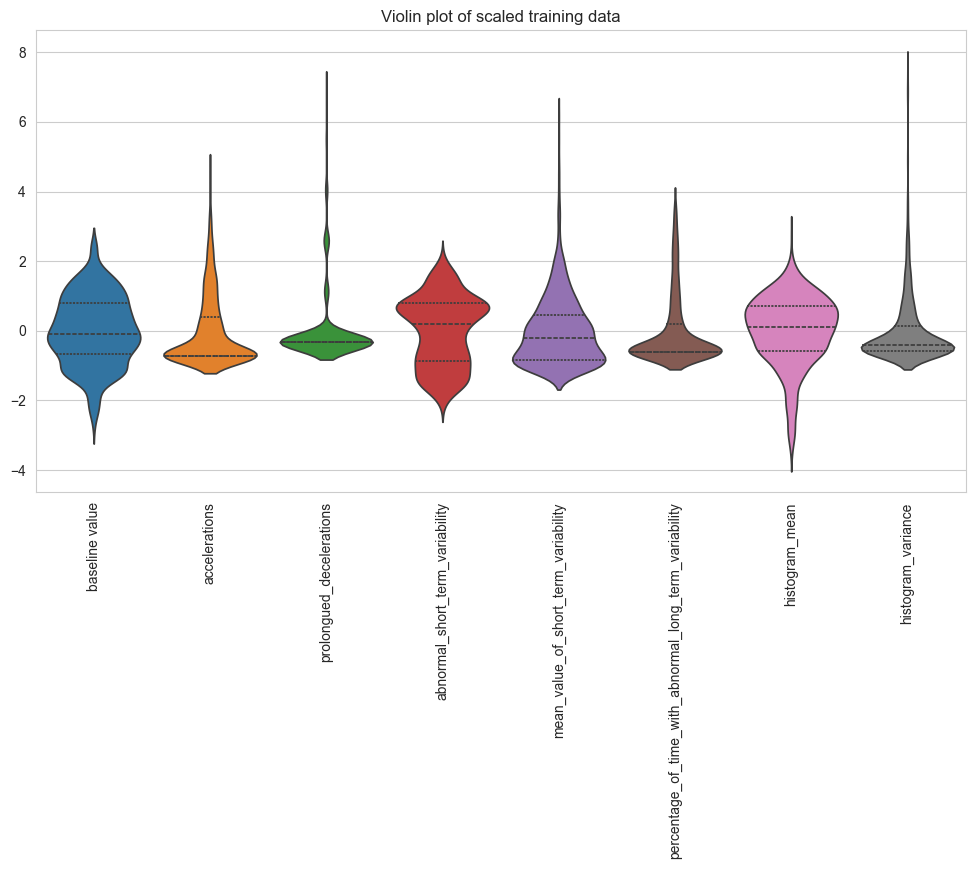

In [10]:
# Standardize the training and test data with Z-scaling
def Xscale(x, X_train):
    X_mean = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    return (x - X_mean) / X_std

X_train_scaled = Xscale(X_train, X_train)
X_test_scaled = Xscale(X_test, X_train)


# Checking scaling by printing mean and standard deviation of each feature
print("Mean of scaled x features:", np.mean(X_train_scaled, axis=0))
print("\nStandard deviation of scaled x features:", np.std(X_train_scaled, axis=0))

# Convert to DataFrame 
df_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_columns)

# Create a violin plot to visualize the distribution of scaled features
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_train_scaled, inner="quartile")
plt.xticks(rotation=90)
plt.title("Violin plot of scaled training data")
plt.show()


## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [ ]:
# Define dataset sizes and number of epochs
dataset_sizes = list(range(50, 701, 50))  # 50, 100, ..., 700
num_epochs = list(range(2, 98, 5))  # 2, 7, ..., 97

# Define classifiers to use
classifiers = {
    "Perceptron": Perceptron,
    "Adaline": Adaline,
    "LogisticRegression": LogisticRegression
}

# Initialize a numpy array to store accuracy results (3 classifiers × 14 dataset sizes × 20 epochs)
results = np.zeros((len(classifiers), len(dataset_sizes), len(num_epochs)))

# Train and evaluate models
for c_idx, (clf_name, clf_class) in enumerate(classifiers.items()):
    print(f"Training {clf_name}...")  # Progress tracking
    
    for i, size in enumerate(dataset_sizes):
        X_train_subset = X_train_scaled[:size]  # Select first `size` rows
        y_train_subset = y_train[:size].ravel()  # Select corresponding labels
        
        for j, epochs in enumerate(num_epochs):
            # Initialize classifier with required parameters
            if clf_class in [Adaline, LogisticRegression]:
                model = clf_class(eta=0.0001, epochs=epochs, minibatches=1, random_seed=42)
            else: 
                model = clf_class(eta=0.0001, epochs=epochs, random_seed=42)
            
            # Train the model
            model.fit(X_train_subset, y_train_subset)
            
            # Predict on the test set
            y_pred = model.predict(X_test_scaled)
            
            # Compute accuracy
            accuracy = np.mean(y_pred == y_test)  # Same as np.sum(y_pred == y_test) / len(y_test)
            
            # Store the result
            results[c_idx, i, j] = accuracy  #Lagrer nøyaktigheten i results, en 3D numpy-array med dimensjoner (3, 14, 20)

# Convert results into a structured DataFrame for better visualization
index_labels = ["Perceptron", "Adaline", "LogisticRegression"]
df_dict = {index_labels[i]: pd.DataFrame(results[i], index=dataset_sizes, columns=num_epochs) for i in range(3)}

print(f"done") #To show when the code is done running

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten to make indexing easier


# Generate a heatmap for each classifier, showing accuracy across dataset size and epoch count
for i, (model, df) in enumerate(df_dict.items()):
    sns.heatmap(df, annot=False, cmap="gist_heat", ax=axes[i])  # Use subplot axes
    axes[i].set_title(f"{model} Accuracy")
    axes[i].set_xlabel("Number of Epochs")
    axes[i].set_ylabel("Dataset Size")

# Hide the unused fourth subplot
axes[3].set_visible(False)

# Adjust width and height spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

In [ ]:
# === 1. Train a logistic regression model ===
# Initializes a logistic regression model with:
# - Learning rate (eta) = 0.0001
# - Number of epochs = 300
# - minibatches=1 ensures that gradient descent is used
# - random_seed=42 for reproducing the results

clf = LogisticRegression(eta=0.0001, epochs=300, minibatches=1, random_seed=42)

# Train the model on the test set (NOTE: usually the model is trained on the training set, but here the test set is used)
clf.fit(X_test_scaled, y_test)  

# === 2. Create figures for decision boundaries between features ===
# Creates an 8x8 matrix of subplots with size 30x30 inches
fig, axes = plt.subplots(8, 8, figsize=(30, 30))

# Runs through all combinations of features to visualize decision boundaries
for i in range(0, 8):  # Iterates over first feature
    for j in range(0, 8):  # Iterates over second feature
        feature_1 = i  # Index for first feature
        feature_2 = j  # Index for second feature
        ax = axes[i, j]  # Selects the axes for subplot

        # Sets labels on the axes
        ax.set_xlabel(f"Feature {feature_1}")
        ax.set_ylabel(f"Feature {feature_2}")

        # Finds minimum and maximum values for the two selected features
        mins = X_test_scaled.min(axis=0)
        maxs = X_test_scaled.max(axis=0)

        # Creates a linear interval of values for the features
        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        # Creates a meshgrid of values
        X0, X1 = np.meshgrid(x0, x1)
    
        # Combines the two features in a 2D matrix
        X_two_features = np.column_stack((X0.ravel(), X1.ravel()))
        
        # Creates a zero matrix to represent complete feature set
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1]))

        # Inserts the selected feature values in the correct places
        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        # Predicts the probability for class 1 (positive class)
        y_pred = clf.predict_proba(X_plot)

        # Formats the result to grid format
        Z = y_pred.reshape(X0.shape)

        # === 3. Draw decision boundary and data points ===
        # Colors the decision area based on predicted probability
        ax.pcolor(X0, X1, Z)

        # Draws the decision boundary (level 0.5 separates the classes)
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')

        # Plot data points for each class
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], 
                   color="b", marker="^", s=50, facecolors="none")  # Class 0 (blue triangles)
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], 
                   color="y", marker="o", s=50, facecolors="none")  # Class 1 (yellow circles)

# Adjusts layout to avoid overlapping figures
fig.tight_layout()

# Shows the plot
plt.show()

2. A:
The plots show decision boundaries and classification of test data for a Logistic Regression model trained on different pairs of features from the dataset. Each subplot visualizes how the model distinguishes between the classes based on two specific features.

3. A:
The contour line (decision boundary) shows where the model is uncertain (50% probability for class 0 or 1).
The yellow circles refer to class 0 and the blue triangles refer to class 1. Class 0 and 1 refer to whether the y-value (fetal health) is 0 or 1. If a blue triangle lies far inside the yellow area → The model has misclassified it. If a yellow circle lies far inside the blue area → Also misclassification.

X and Y coordinates come from the values ​​of two features from the test set. If the points are close to the black decision boundary, it means that the model was unsure of the classification.

Disadvantages of the subplots: The training data (X_train_scaled) is not displayed, even though the model is trained on it. If the training data had been plotted, we could have seen if the model is overfitting the training data. We cannot see how the model has actually learned from the training set.
Another thing; the decision boundaries may be more complex in full dimension, but look simpler in 2D. A data point that looks misclassified in one combination of features may actually be correctly classified if we include more features.


## Part VI: Additional discussion

### Part I:
1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?


A: Fetal health is displayed in a "count-plot" since it is a categorical variable (either 0 or 1). The others were shown in a histogram, which shows the distribution of a numerical variable by grouping data into "bins". It helps to understand how the data is distributed (normally distributed, skewed, or has multiple peaks).

### Part II:
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?

A: The model can learn the order instead of patterns. Shuffling ensures that different classes are mixed so that the model learns a balanced pattern.

2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?

A: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42, shuffle=True)

### Part IV:
1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.

A: Based on the heatmap in task 4, we can see that accuracy increases with larger datasets. This is probably because more data allows the model to learn better decision boundaries and generalize better to new test data. The improvement decreases after about 500 samples.
After this point, more data does not provide a significant increase in performance. Then the model has already learned the most important patterns in the data.

2. Describe the relationship between the number of epochs and model accuracy

A: For all dataset sizes, accuracy increases with the number of epochs. With smaller datasets (50–200 samples), we observe greater fluctuations in accuracy depending on the number of epochs. This suggests that the model tends to overfit small datasets, where it "learns" the training data too well, but does not generalize well to the test set. Large datasets provide more stable accuracy, which means that the model becomes less sensitive to the number of epochs.

3. Which classifier is much slower to train and why do you think that is?

A: The Perceptron classifier is slower because it updates weights after every misclassified sample, leading to frequent recomputations and updates. Additonally, it only converges if the data is linearly separable; otherwise, it keeps adjusting the weights indefinitely. In contrast, Adaline and Logistic Regression use Gradient Descent, where weights are updated gradually based on a cost function, leading to fewer and more controlled updates.


4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?

A: It updates the weights only when a misclassification occurs (binary update rule, either misclassified or not). With small datasets, the Perceptron often learns poor and random decision boundaries.

The Perceptron only provides binary predictions (0 or 1) without using probabilities. This can result in highly variable accuracy, depending on how the training data is organized and how many misclassifications occur early in training.

If the data is not perfectly separable, the model will never converge, leading to unstable accuracy. This results in high variation in performance because the model is sensitive to the order of training data. If the data is not separable, it will never find a stable decision boundary

